In [21]:
import numpy as np
import getopt
import os, sys
 
# Main path to your caffe installation
caffe_root = '/home/payam/workspace/caffe/'

sys.path.insert(0, caffe_root + 'python')
import caffe
 
# Model prototxt file
model_prototxt = caffe_root + 'models/bvlc_googlenet/deploy.prototxt'
 
# Model caffemodel file
model_trained = caffe_root + 'models/bvlc_googlenet/bvlc_googlenet.caffemodel'
 
# File containing the class labels
imagenet_labels = caffe_root + 'data/ilsvrc12/synset_words.txt'
 
# Path to the mean image (used for input processing)
mean_path = caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy'
 
# Name of the layer we want to extract
layer_name = 'pool5/7x7_s1'
 

def main():
    inputfile = '/home/payam/dataset/cd_covers/Reference/images1.txt'
    outputfile = '/home/payam/dataset/cd_covers/Reference/features.txt'

 
    # Setting this to CPU, but feel free to use GPU if you have CUDA installed
    caffe.set_mode_cpu()
    # Loading the Caffe model, setting preprocessing parameters
    net = caffe.Classifier(model_prototxt, model_trained,
                           mean=np.load(mean_path).mean(1).mean(1),
                           channel_swap=(2,1,0),
                           raw_scale=255,
                           image_dims=(256, 256))
 
    # Loading class labels
    with open(imagenet_labels) as f:
        labels = f.readlines()
 
    # This prints information about the network layers (names and sizes)
    # You can uncomment this, to have a look inside the network and choose which layer to print
    #print [(k, v.data.shape) for k, v in net.blobs.items()]
    #exit()
    feature_list = [] 
    # Processing one image at a time, printint predictions and writing the vector to a file
    with open(inputfile, 'r') as reader:
        with open(outputfile, 'w') as writer:
            writer.truncate()
            for image_path in reader:
                print image_path
                image_path = image_path.strip()
                input_image = caffe.io.load_image(image_path)
                prediction = net.predict([input_image], oversample=False)
                print os.path.basename(image_path), ' : ' , labels[prediction[0].argmax()].strip() , ' (', prediction[0][prediction[0].argmax()] , ')'
                features = net.blobs[layer_name].data[0].reshape(1,-1)
                feature_list.append(features)
                np.savetxt(writer, features, fmt='%.8g')

In [22]:
main()

/home/payam/dataset/cd_covers/Reference/081.jpg

081.jpg  :  n06794110 street sign  ( 0.17401 )
/home/payam/dataset/cd_covers/Reference/074.jpg

074.jpg  :  n03476684 hair slide  ( 0.468284 )
/home/payam/dataset/cd_covers/Reference/090.jpg

090.jpg  :  n06596364 comic book  ( 0.656002 )
/home/payam/dataset/cd_covers/Reference/093.jpg

093.jpg  :  n03141823 crutch  ( 0.383003 )
/home/payam/dataset/cd_covers/Reference/008.jpg

008.jpg  :  n03759954 microphone, mike  ( 0.29509 )
/home/payam/dataset/cd_covers/Reference/020.jpg

020.jpg  :  n03595614 jersey, T-shirt, tee shirt  ( 0.11308 )
/home/payam/dataset/cd_covers/Reference/025.jpg

025.jpg  :  n02916936 bulletproof vest  ( 0.284277 )
/home/payam/dataset/cd_covers/Reference/086.jpg

086.jpg  :  n07248320 book jacket, dust cover, dust jacket, dust wrapper  ( 0.482491 )
/home/payam/dataset/cd_covers/Reference/017.jpg

017.jpg  :  n02676566 acoustic guitar  ( 0.35975 )
/home/payam/dataset/cd_covers/Reference/077.jpg

077.jpg  :  n03459775

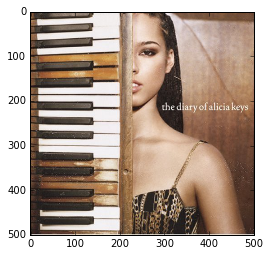

In [12]:
image = caffe.io.load_image('/home/payam/dataset/cd_covers/Reference/001.jpg')
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(image)